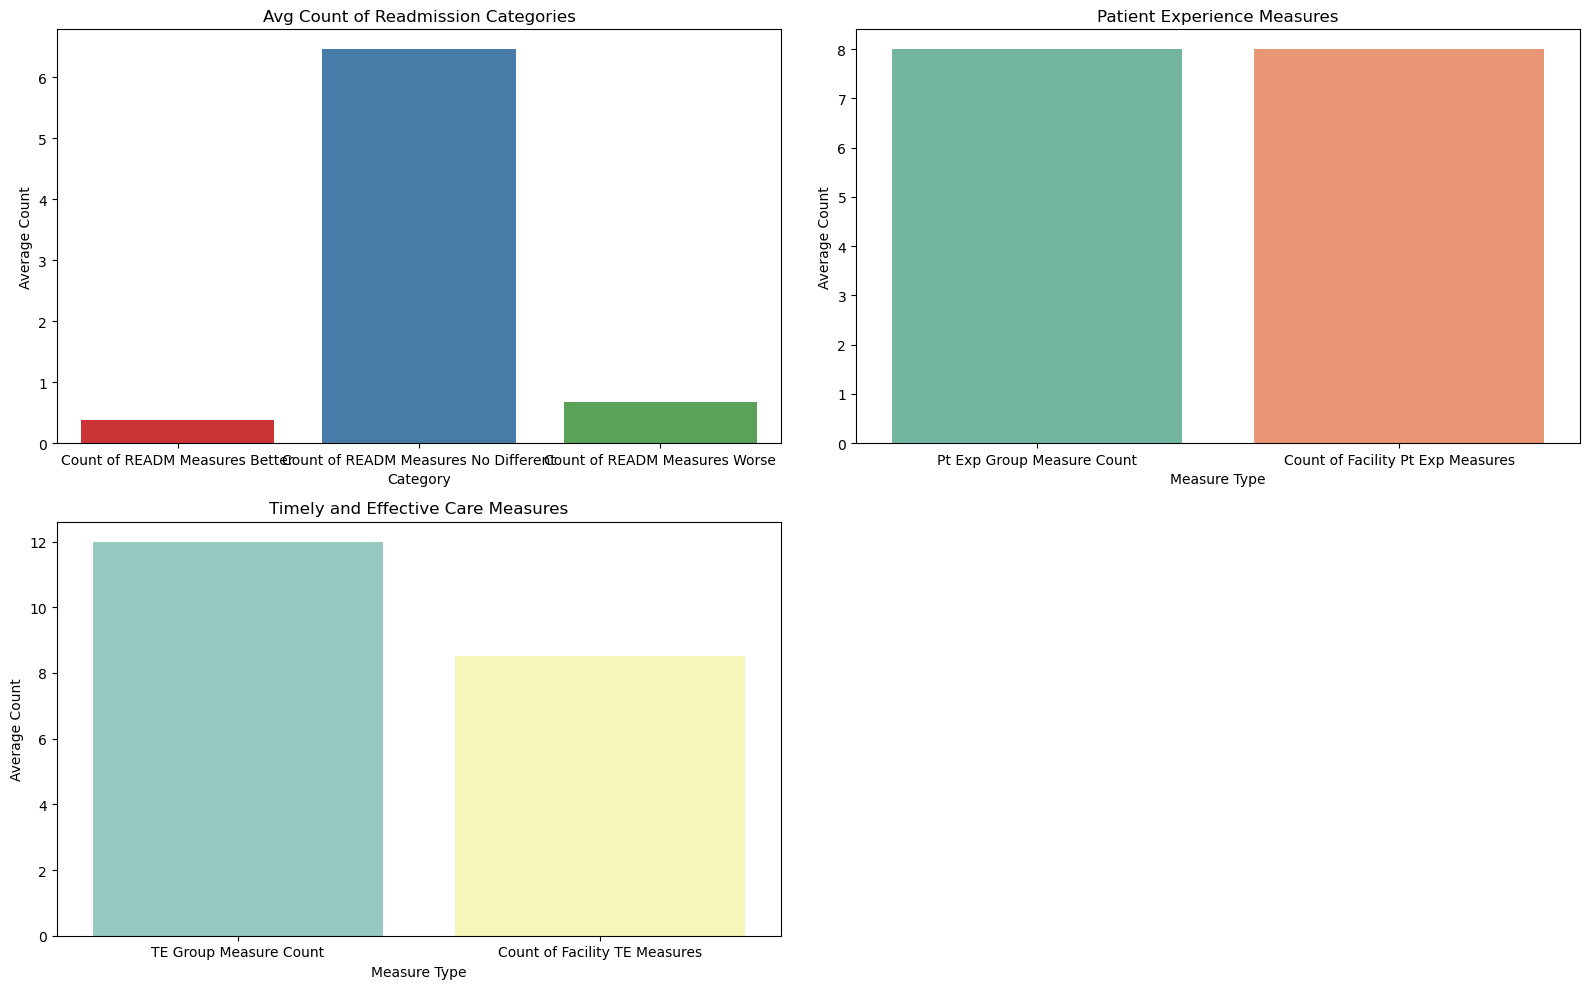

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('C:/Users/Dhiyanesh Srinivasan/OneDrive/Desktop/GIT/Hospital/Hospital_General_Information.csv')

# Convert relevant columns to numeric where applicable
cols_to_numeric = [
    'Count of READM Measures Better',
    'Count of READM Measures No Different',
    'Count of READM Measures Worse',
    'Pt Exp Group Measure Count',
    'Count of Facility Pt Exp Measures',
    'TE Group Measure Count',
    'Count of Facility TE Measures'
]

df_numeric = df.copy()
df_numeric[cols_to_numeric] = df_numeric[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in these columns for clean analysis
df_clean = df_numeric.dropna(subset=cols_to_numeric)

# Prepare plots for each metric category
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
readm_avg = df_clean[[
    'Count of READM Measures Better',
    'Count of READM Measures No Different',
    'Count of READM Measures Worse'
]].mean().reset_index()
readm_avg.columns = ['Category', 'Average Count']
sns.barplot(data=readm_avg, x='Category', y='Average Count', palette='Set1')
plt.title('Avg Count of Readmission Categories')

plt.subplot(2, 2, 2)
pt_exp_avg = df_clean[[
    'Pt Exp Group Measure Count',
    'Count of Facility Pt Exp Measures'
]].mean().reset_index()
pt_exp_avg.columns = ['Measure Type', 'Average Count']
sns.barplot(data=pt_exp_avg, x='Measure Type', y='Average Count', palette='Set2')
plt.title('Patient Experience Measures')

plt.subplot(2, 2, 3)
te_avg = df_clean[[
    'TE Group Measure Count',
    'Count of Facility TE Measures'
]].mean().reset_index()
te_avg.columns = ['Measure Type', 'Average Count']
sns.barplot(data=te_avg, x='Measure Type', y='Average Count', palette='Set3')
plt.title('Timely and Effective Care Measures')

plt.tight_layout()
plt.show()
